# CLASSIFICAÇÃO DE NÓDULOS DE TIREOIDE EM IMAGENS DE ULTRASSONOGRAFIA UTILIZANDO TÉCNICAS DE MACHINE LEARNING 

# <span style="color:RED"> VISÃO GERAL </span>


### BANCO DE DADOS: http://cimalab.intec.co/applications/thyroid/

### IMAGEM DO PACIENTE 2

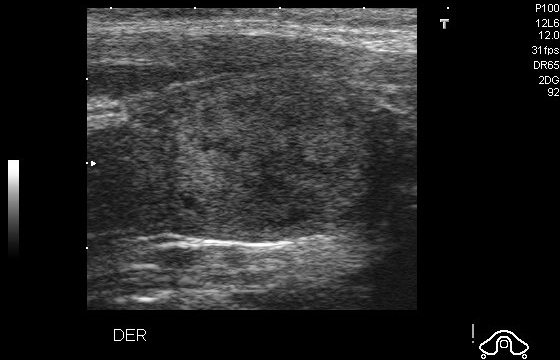

### XML CORRESPONDENTE AO PACIENTE 2

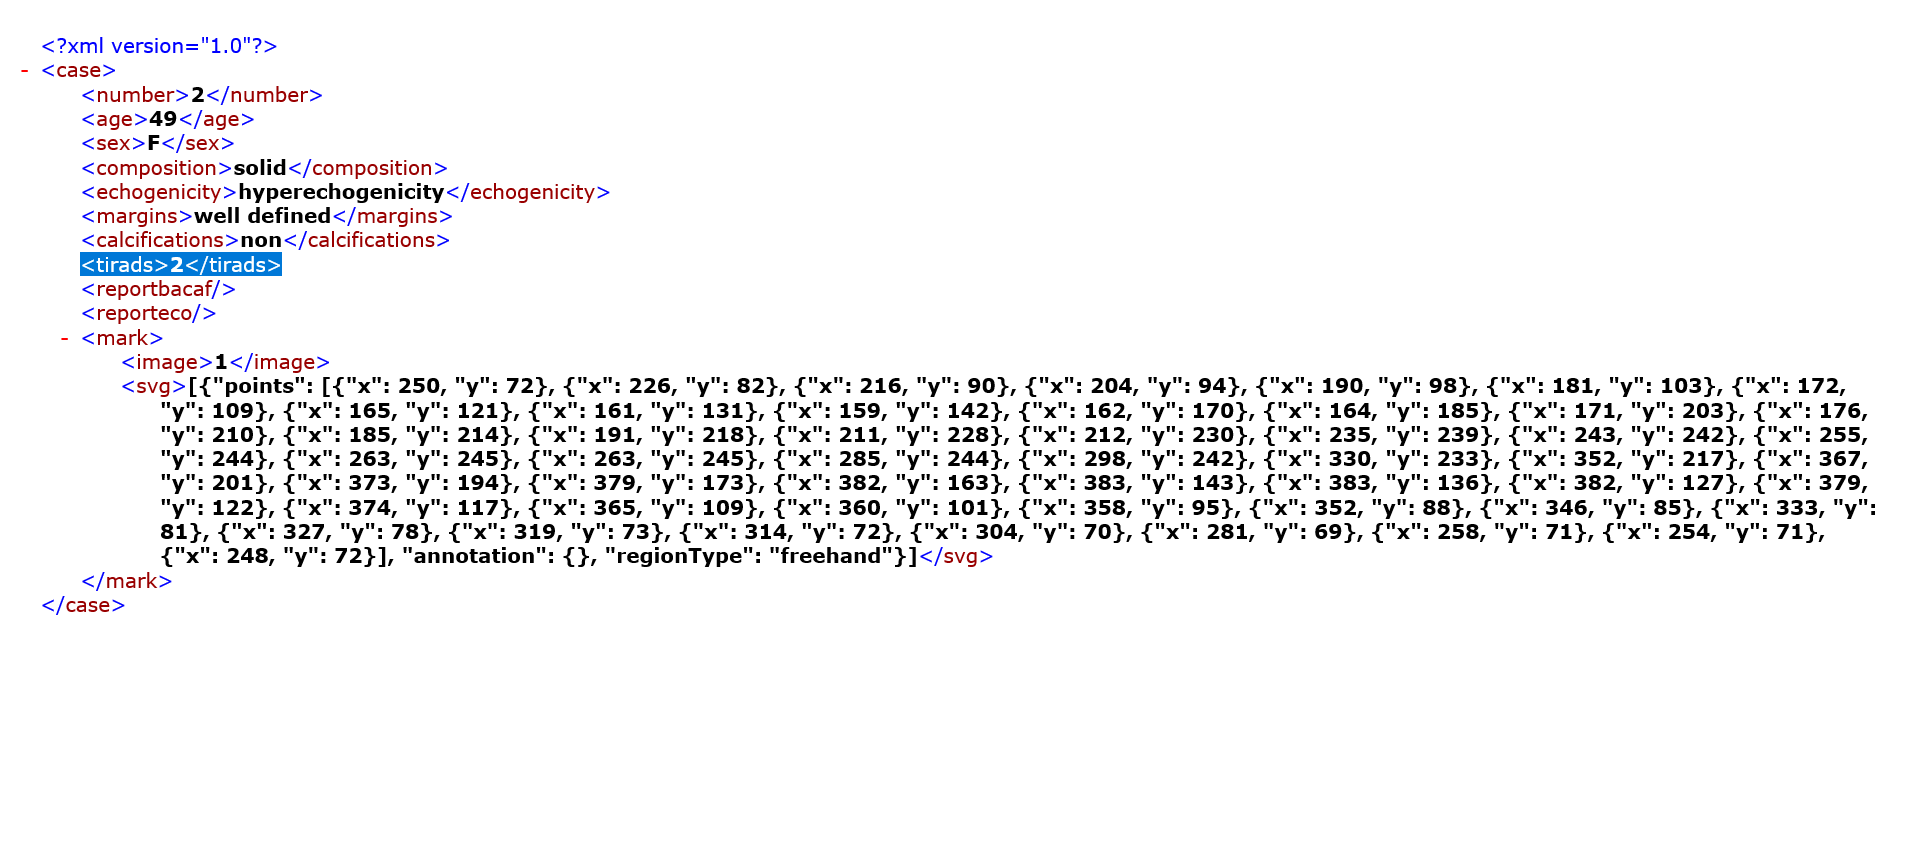

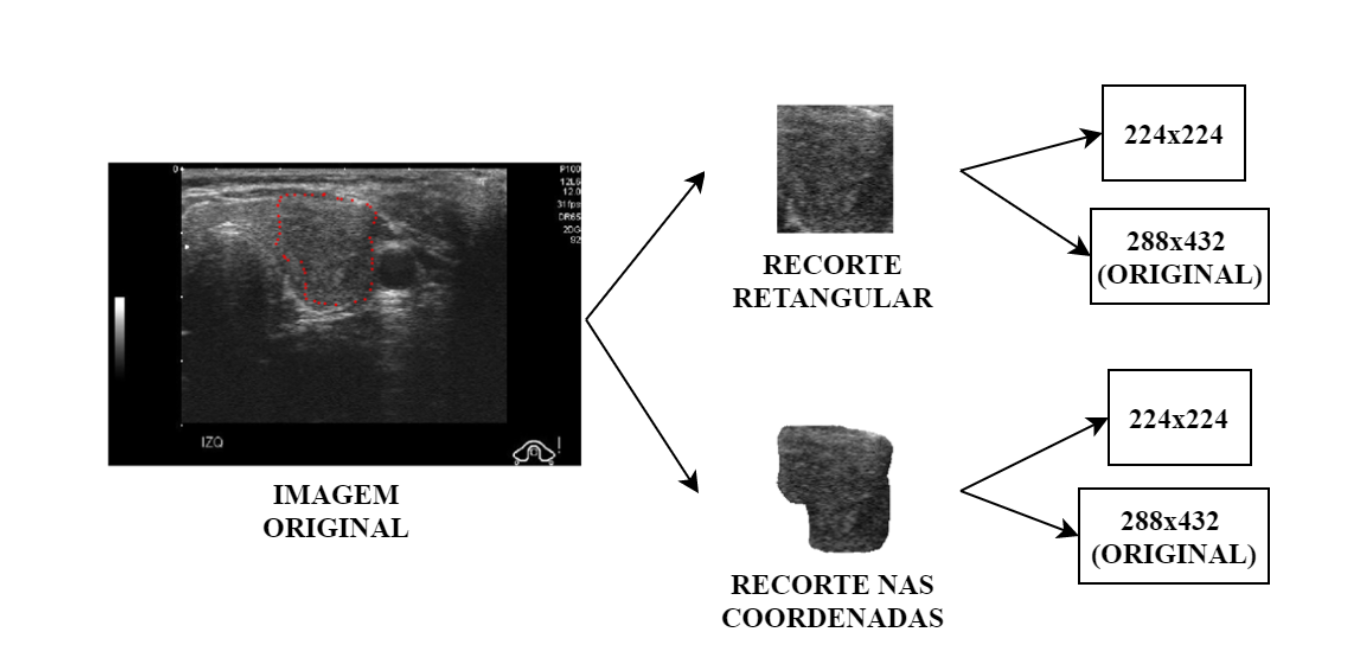

## METODOLOGIA GERAL

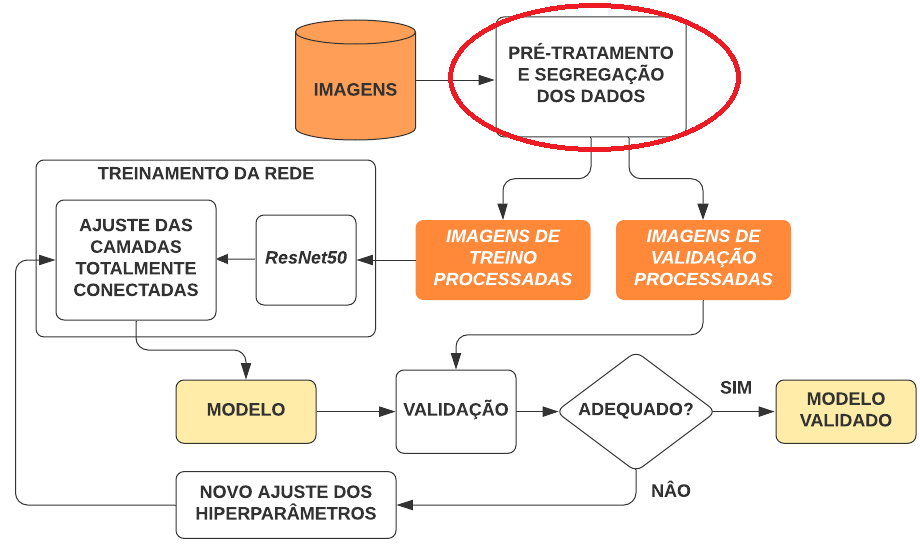

# PRÉ-TRATAMENTO E SEGREGAÇÃO DOS DADOS








# IMPORTAR OS PACOTES

In [1]:
#Import all libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
from PIL import Image
import glob
import ast
from PIL import Image, ImageDraw
import cv2
from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import re
plt.rcParams["figure.figsize"] = (12,12)


C:\Users\Bernardo\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
Using TensorFlow backend.


# FUNÇÃO PARA LER OS ARQUIVOS XML

In [2]:
def read_xml(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    return lines

# FUNÇÃO PARA PLOTAR AS IMAGENS VINDO DO DATAFRAME

In [3]:
# Plotting Function
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax


# CRIANDO UMA LISTA DOS NOMES DOS ARQUIVOS DAS IMAGENS

In [4]:
filenames = glob.glob("C:/Users/Bernardo/TCC/thyroid/*")

In [5]:
filenames

['C:/Users/Bernardo/TCC/thyroid\\1.xml',
 'C:/Users/Bernardo/TCC/thyroid\\10.xml',
 'C:/Users/Bernardo/TCC/thyroid\\100.xml',
 'C:/Users/Bernardo/TCC/thyroid\\100_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\101.xml',
 'C:/Users/Bernardo/TCC/thyroid\\101_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\102.xml',
 'C:/Users/Bernardo/TCC/thyroid\\102_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\103.xml',
 'C:/Users/Bernardo/TCC/thyroid\\103_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\104.xml',
 'C:/Users/Bernardo/TCC/thyroid\\104_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\105.xml',
 'C:/Users/Bernardo/TCC/thyroid\\105_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\106.xml',
 'C:/Users/Bernardo/TCC/thyroid\\106_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\106_2.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\106_3.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\106_4.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\107.xml',
 'C:/Users/Bernardo/TCC/thyroid\\107_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\108.xml',
 'C:/Users/Bernardo/TCC/thyroid\\10

# LISTA DO DIRETORIO DA LOCALIZAÇÃO DAS IMAGENS E DO DIRETORIO DA LOCALIZAÇÃO DOS ARQUIVOS XML

In [6]:
# Create List of Images Files
images = [x for x in filenames if x.endswith(".jpg")]

# Create List of Segments
segments = [x for x in filenames if x.endswith(".xml")]

In [7]:
images

['C:/Users/Bernardo/TCC/thyroid\\100_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\101_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\102_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\103_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\104_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\105_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\106_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\106_2.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\106_3.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\106_4.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\107_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\108_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\109_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\10_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\110_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\111_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\112_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\113_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\114_2.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\115_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\116_1.jpg',
 'C:/Users/Bernardo/TCC/thyroid\\117_1.jpg',
 'C:/Users/

In [8]:
segments

['C:/Users/Bernardo/TCC/thyroid\\1.xml',
 'C:/Users/Bernardo/TCC/thyroid\\10.xml',
 'C:/Users/Bernardo/TCC/thyroid\\100.xml',
 'C:/Users/Bernardo/TCC/thyroid\\101.xml',
 'C:/Users/Bernardo/TCC/thyroid\\102.xml',
 'C:/Users/Bernardo/TCC/thyroid\\103.xml',
 'C:/Users/Bernardo/TCC/thyroid\\104.xml',
 'C:/Users/Bernardo/TCC/thyroid\\105.xml',
 'C:/Users/Bernardo/TCC/thyroid\\106.xml',
 'C:/Users/Bernardo/TCC/thyroid\\107.xml',
 'C:/Users/Bernardo/TCC/thyroid\\108.xml',
 'C:/Users/Bernardo/TCC/thyroid\\109.xml',
 'C:/Users/Bernardo/TCC/thyroid\\11.xml',
 'C:/Users/Bernardo/TCC/thyroid\\110.xml',
 'C:/Users/Bernardo/TCC/thyroid\\111.xml',
 'C:/Users/Bernardo/TCC/thyroid\\112.xml',
 'C:/Users/Bernardo/TCC/thyroid\\113.xml',
 'C:/Users/Bernardo/TCC/thyroid\\114.xml',
 'C:/Users/Bernardo/TCC/thyroid\\115.xml',
 'C:/Users/Bernardo/TCC/thyroid\\116.xml',
 'C:/Users/Bernardo/TCC/thyroid\\117.xml',
 'C:/Users/Bernardo/TCC/thyroid\\118.xml',
 'C:/Users/Bernardo/TCC/thyroid\\119.xml',
 'C:/Users/Bern

# CRIANDO UMA LISTA DO CONTEUDO DE CADA ARQUIVO XML

In [9]:
marks = [read_xml(file) for file in segments]

In [10]:
marks

[['<case><number>1</number><age></age><sex></sex><composition></composition><echogenicity></echogenicity><margins></margins><calcifications></calcifications><tirads></tirads><reportbacaf></reportbacaf><reporteco></reporteco><mark><image>1</image><svg>[{"points": [{"x": 385, "y": 182}, {"x": 398, "y": 179}, {"x": 404, "y": 176}, {"x": 409, "y": 173}, {"x": 415, "y": 159}, {"x": 417, "y": 153}, {"x": 421, "y": 143}, {"x": 421, "y": 136}, {"x": 419, "y": 76}, {"x": 412, "y": 73}, {"x": 406, "y": 69}, {"x": 393, "y": 61}, {"x": 390, "y": 57}, {"x": 383, "y": 53}, {"x": 378, "y": 50}, {"x": 369, "y": 44}, {"x": 360, "y": 42}, {"x": 352, "y": 42}, {"x": 348, "y": 42}, {"x": 340, "y": 41}, {"x": 331, "y": 40}, {"x": 321, "y": 40}, {"x": 311, "y": 39}, {"x": 304, "y": 39}, {"x": 294, "y": 42}, {"x": 270, "y": 43}, {"x": 264, "y": 42}, {"x": 253, "y": 41}, {"x": 242, "y": 39}, {"x": 231, "y": 37}, {"x": 221, "y": 36}, {"x": 209, "y": 35}, {"x": 190, "y": 39}, {"x": 164, "y": 49}, {"x": 158, "y"

In [11]:
#Iniciano um dicionario
temp_dict = {}

#Criando um dicionario com o id de cada imagem como o indice e as marcas da roi como os valores de entrada
for i in marks:
    temp = re.findall(r"<case>(.*?)</case>", str(i))[0]
    id_1 = re.findall(r"<number>(.*?)</number>",temp)[0]
    id_2 = re.findall(r"<image>(.*?)</image>",temp)
    
    for t in id_2:
        pattern = r"<image>"+t+"</image><svg>(.*?)</svg>"
        temp_dict[id_1+'_'+t] = re.findall(pattern,temp)

In [12]:
marks[0]

['<case><number>1</number><age></age><sex></sex><composition></composition><echogenicity></echogenicity><margins></margins><calcifications></calcifications><tirads></tirads><reportbacaf></reportbacaf><reporteco></reporteco><mark><image>1</image><svg>[{"points": [{"x": 385, "y": 182}, {"x": 398, "y": 179}, {"x": 404, "y": 176}, {"x": 409, "y": 173}, {"x": 415, "y": 159}, {"x": 417, "y": 153}, {"x": 421, "y": 143}, {"x": 421, "y": 136}, {"x": 419, "y": 76}, {"x": 412, "y": 73}, {"x": 406, "y": 69}, {"x": 393, "y": 61}, {"x": 390, "y": 57}, {"x": 383, "y": 53}, {"x": 378, "y": 50}, {"x": 369, "y": 44}, {"x": 360, "y": 42}, {"x": 352, "y": 42}, {"x": 348, "y": 42}, {"x": 340, "y": 41}, {"x": 331, "y": 40}, {"x": 321, "y": 40}, {"x": 311, "y": 39}, {"x": 304, "y": 39}, {"x": 294, "y": 42}, {"x": 270, "y": 43}, {"x": 264, "y": 42}, {"x": 253, "y": 41}, {"x": 242, "y": 39}, {"x": 231, "y": 37}, {"x": 221, "y": 36}, {"x": 209, "y": 35}, {"x": 190, "y": 39}, {"x": 164, "y": 49}, {"x": 158, "y":

In [21]:
temp_dict

{'1_1': ['[{"points": [{"x": 385, "y": 182}, {"x": 398, "y": 179}, {"x": 404, "y": 176}, {"x": 409, "y": 173}, {"x": 415, "y": 159}, {"x": 417, "y": 153}, {"x": 421, "y": 143}, {"x": 421, "y": 136}, {"x": 419, "y": 76}, {"x": 412, "y": 73}, {"x": 406, "y": 69}, {"x": 393, "y": 61}, {"x": 390, "y": 57}, {"x": 383, "y": 53}, {"x": 378, "y": 50}, {"x": 369, "y": 44}, {"x": 360, "y": 42}, {"x": 352, "y": 42}, {"x": 348, "y": 42}, {"x": 340, "y": 41}, {"x": 331, "y": 40}, {"x": 321, "y": 40}, {"x": 311, "y": 39}, {"x": 304, "y": 39}, {"x": 294, "y": 42}, {"x": 270, "y": 43}, {"x": 264, "y": 42}, {"x": 253, "y": 41}, {"x": 242, "y": 39}, {"x": 231, "y": 37}, {"x": 221, "y": 36}, {"x": 209, "y": 35}, {"x": 190, "y": 39}, {"x": 164, "y": 49}, {"x": 158, "y": 51}, {"x": 146, "y": 69}, {"x": 137, "y": 80}, {"x": 133, "y": 89}, {"x": 136, "y": 236}, {"x": 142, "y": 244}, {"x": 149, "y": 251}, {"x": 161, "y": 261}, {"x": 210, "y": 271}, {"x": 217, "y": 274}, {"x": 223, "y": 279}, {"x": 228, "y": 2

# CRIAR DATA FRAME DO DICIONARIO 


In [19]:
segments = pd.DataFrame.from_dict(temp_dict, orient='index').reset_index()



# RENOMEAR AS COLUNAS


In [20]:
segments = segments.rename(columns = {'index':'img_id',0:"mark"})

segments.head()

,img_id,mark
0,1_1,"[{""points"": [{""x"": 385, ""y"": 182}, {""x"": 398, ..."
1,1_2,"[{""points"": [{""x"": 417, ""y"": 155}, {""x"": 418, ..."
2,10_1,"[{""points"": [{""x"": 326, ""y"": 172}, {""x"": 332, ..."
3,100_1,"[{""points"": [{""x"": 164, ""y"": 31}, {""x"": 159, ""..."
4,101_1,"[{""points"": [{""x"": 224, ""y"": 156}, {""x"": 224, ..."


# Adicionando o nome do arquivo ao id criado do paciente. 


In [14]:

segments['img_id'] = segments["img_id"].apply(lambda x: "thyroid/"+x+".jpg")

In [15]:
segments.head()


,img_id,mark
0,thyroid/1_1.jpg,"[{""points"": [{""x"": 385, ""y"": 182}, {""x"": 398, ..."
1,thyroid/1_2.jpg,"[{""points"": [{""x"": 417, ""y"": 155}, {""x"": 418, ..."
2,thyroid/10_1.jpg,"[{""points"": [{""x"": 326, ""y"": 172}, {""x"": 332, ..."
3,thyroid/100_1.jpg,"[{""points"": [{""x"": 164, ""y"": 31}, {""x"": 159, ""..."
4,thyroid/101_1.jpg,"[{""points"": [{""x"": 224, ""y"": 156}, {""x"": 224, ..."


In [16]:
#Iniciano um dicionario
temp_dict1 = {}

#Criando um dicionario com o id de cada imagem como o indice e a avaliaçao TIRADS como os valores de entrada
for i in marks:
    pattern1 = r"<case>(.*?)</case>"
    temp1 = re.findall(pattern1, str(i))[0]
    
    id_11 = re.findall(r"<number>(.*?)</number>",temp1)[0]
    id_21 = re.findall(r"<image>(.*?)</image>",temp1)
    
    for t in id_21:
        pattern1 = r"<tirads>(.*?)</tirads>"
        temp_dict1[id_11+'_'+t] = re.findall(pattern1,temp1)

In [18]:
#CRIAR DATA FRAME DO DICIONARIO 
df_temp_dict1 = pd.DataFrame.from_dict(temp_dict1, orient='index').reset_index()

#RENOMEAR AS COLUNAS
df_temp_dict1 = df_temp_dict1.rename(columns = {'index':'img_id1',0:"tirads"})

df_temp_dict1.head()

,img_id1,tirads
0,1_1,
1,1_2,
2,10_1,4b
3,100_1,4a
4,101_1,5


In [18]:
df_temp_dict1['img_id1'] =df_temp_dict1["img_id1"].apply(lambda x: "thyroid/"+x+".jpg")

In [19]:
dados=[segments, df_temp_dict1]

In [20]:
#concatenando os dataframes
segments=pd.concat(dados, axis=1)

In [21]:
segments.head()

,img_id,mark,img_id1,tirads
0,thyroid/1_1.jpg,"[{""points"": [{""x"": 385, ""y"": 182}, {""x"": 398, ...",thyroid/1_1.jpg,
1,thyroid/1_2.jpg,"[{""points"": [{""x"": 417, ""y"": 155}, {""x"": 418, ...",thyroid/1_2.jpg,
2,thyroid/10_1.jpg,"[{""points"": [{""x"": 326, ""y"": 172}, {""x"": 332, ...",thyroid/10_1.jpg,4b
3,thyroid/100_1.jpg,"[{""points"": [{""x"": 164, ""y"": 31}, {""x"": 159, ""...",thyroid/100_1.jpg,4a
4,thyroid/101_1.jpg,"[{""points"": [{""x"": 224, ""y"": 156}, {""x"": 224, ...",thyroid/101_1.jpg,5


# Excluindo a columa img_id1


In [22]:
segments=segments.drop(columns=['img_id1'])


# Quantos que nao tinham as marks sairam


In [23]:
mark_out=np.where(segments['mark']=="")[0]

# Quantos que nao tinham a avaliaçao tirads sairam


In [24]:
tirads_out=np.where(segments['tirads']=="")[0]

# Retirando as entradas do df que não tem nada


In [25]:
segments = segments[segments['mark']!=""]

# Retirando as entradas do df que não tem nada


In [26]:
segments = segments[segments['tirads']!=""]

# SEPARAR AS COORDEANDAS ENTRE MARK_1 E MARK_2


In [27]:
pattern = r'"points"(.*?)"annotation"'
segments["mark_1"] = segments["mark"].apply(lambda x: re.findall(pattern, x)[0])
segments["mark_2"] = segments["mark"].apply(lambda x: re.findall(pattern, x)[1] if len(re.findall(pattern, x)) > 1 else "")


In [28]:
segments.head()

,img_id,mark,tirads,mark_1,mark_2
2,thyroid/10_1.jpg,"[{""points"": [{""x"": 326, ""y"": 172}, {""x"": 332, ...",4b,": [{""x"": 326, ""y"": 172}, {""x"": 332, ""y"": 172},...",
3,thyroid/100_1.jpg,"[{""points"": [{""x"": 164, ""y"": 31}, {""x"": 159, ""...",4a,": [{""x"": 164, ""y"": 31}, {""x"": 159, ""y"": 31}, {...",": [{""x"": 381, ""y"": 24}, {""x"": 370, ""y"": 28}, {..."
4,thyroid/101_1.jpg,"[{""points"": [{""x"": 224, ""y"": 156}, {""x"": 224, ...",5,": [{""x"": 224, ""y"": 156}, {""x"": 224, ""y"": 147},...",": [{""x"": 462, ""y"": 157}, {""x"": 462, ""y"": 152},..."
5,thyroid/102_1.jpg,"[{""points"": [{""x"": 219, ""y"": 73}, {""x"": 217, ""...",4b,": [{""x"": 219, ""y"": 73}, {""x"": 217, ""y"": 68}, {...",": [{""x"": 410, ""y"": 124}, {""x"": 422, ""y"": 118},..."
6,thyroid/103_1.jpg,"[{""points"": [{""x"": 208, ""y"": 120}, {""x"": 211, ...",4a,": [{""x"": 208, ""y"": 120}, {""x"": 211, ""y"": 115},...",": [{""x"": 407, ""y"": 116}, {""x"": 413, ""y"": 109},..."


# CRIANDO UM VETOR PARA OS NOVOS INDICES DO DATAFRAME


In [29]:
new_index=[]
for i in range (len(segments)):
    new_index1=i
    new_index.append(new_index1)
new_index=np.array(new_index)

# DATAFRAME COM OS ÍNDICES REORDENADOS

In [62]:
segments=segments.set_index(new_index)
segments

,img_id,mark,tirads,mark_1,mark_2
0,thyroid/10_1.jpg,"[{""points"": [{""x"": 326, ""y"": 172}, {""x"": 332, ...",4b,": [{""x"": 326, ""y"": 172}, {""x"": 332, ""y"": 172},...",
1,thyroid/100_1.jpg,"[{""points"": [{""x"": 164, ""y"": 31}, {""x"": 159, ""...",4a,": [{""x"": 164, ""y"": 31}, {""x"": 159, ""y"": 31}, {...",": [{""x"": 381, ""y"": 24}, {""x"": 370, ""y"": 28}, {..."
2,thyroid/101_1.jpg,"[{""points"": [{""x"": 224, ""y"": 156}, {""x"": 224, ...",5,": [{""x"": 224, ""y"": 156}, {""x"": 224, ""y"": 147},...",": [{""x"": 462, ""y"": 157}, {""x"": 462, ""y"": 152},..."
3,thyroid/102_1.jpg,"[{""points"": [{""x"": 219, ""y"": 73}, {""x"": 217, ""...",4b,": [{""x"": 219, ""y"": 73}, {""x"": 217, ""y"": 68}, {...",": [{""x"": 410, ""y"": 124}, {""x"": 422, ""y"": 118},..."
4,thyroid/103_1.jpg,"[{""points"": [{""x"": 208, ""y"": 120}, {""x"": 211, ...",4a,": [{""x"": 208, ""y"": 120}, {""x"": 211, ""y"": 115},...",": [{""x"": 407, ""y"": 116}, {""x"": 413, ""y"": 109},..."
5,thyroid/105_1.jpg,"[{""points"": [{""x"": 159, ""y"": 55}, {""x"": 148, ""...",4a,": [{""x"": 159, ""y"": 55}, {""x"": 148, ""y"": 58}, {...",": [{""x"": 403, ""y"": 60}, {""x"": 392, ""y"": 65}, {..."
6,thyroid/107_1.jpg,"[{""points"": [{""x"": 428, ""y"": 144}, {""x"": 437, ...",4a,": [{""x"": 428, ""y"": 144}, {""x"": 437, ""y"": 142},...",": [{""x"": 165, ""y"": 114}, {""x"": 159, ""y"": 114},..."
7,thyroid/108_1.jpg,"[{""points"": [{""x"": 294, ""y"": 84}, {""x"": 287, ""...",4a,": [{""x"": 294, ""y"": 84}, {""x"": 287, ""y"": 84}, {...",
8,thyroid/109_1.jpg,"[{""points"": [{""x"": 293, ""y"": 148}, {""x"": 293, ...",4b,": [{""x"": 293, ""y"": 148}, {""x"": 293, ""y"": 140},...",
9,thyroid/11_1.jpg,"[{""points"": [{""x"": 292, ""y"": 57}, {""x"": 288, ""...",5,": [{""x"": 292, ""y"": 57}, {""x"": 288, ""y"": 57}, {...",


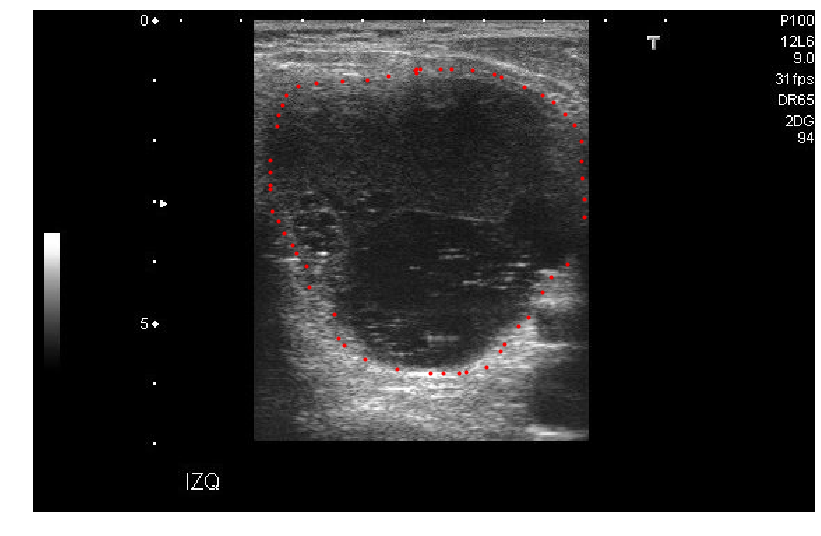

In [71]:
imagem = "thyroid/88_1.jpg"
test = segments.loc[segments['img_id']== imagem]
l = test['mark'].get_values()[0]

i = 0
t = 0

test_1 = re.findall(r'\d+', l)

dims = len(test_1)//2

temp = np.empty([dims, 2])
temp

while i < dims:
    temp[i] = (test_1[t], test_1[t+1])
    i = i+1
    t = t+2


fig, ax = image_show(Image.open('C:/Users/Bernardo/TCC/'+imagem), cmap='gray')
ax.plot(temp[:, 0], temp[:, 1], '.r',lw=3)

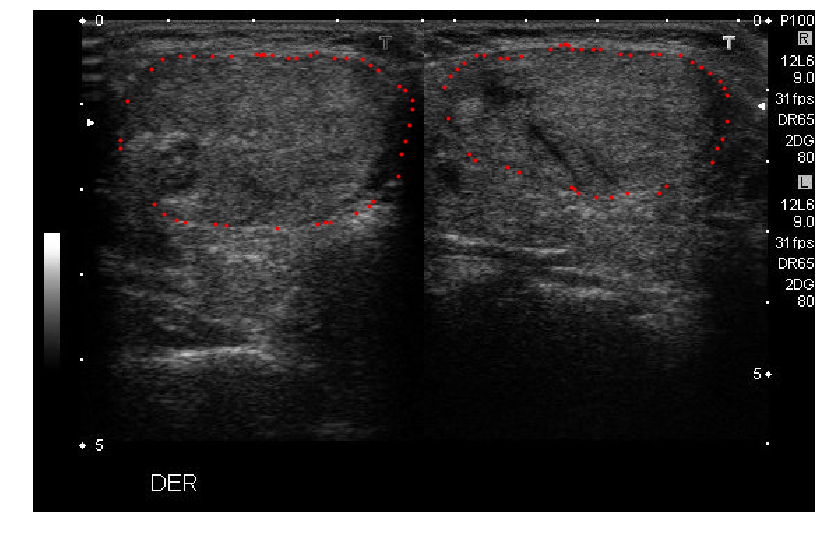

In [72]:
imagem = "thyroid/100_1.jpg"
test = segments.loc[segments['img_id']== imagem]
l = test['mark'].get_values()[0]

i = 0
t = 0

test_1 = re.findall(r'\d+', l)

dims = len(test_1)//2

temp = np.empty([dims, 2])
temp

while i < dims:
    temp[i] = (test_1[t], test_1[t+1])
    i = i+1
    t = t+2


fig, ax = image_show(Image.open('C:/Users/Bernardo/TCC/'+imagem), cmap='gray')
ax.plot(temp[:, 0], temp[:, 1], '.r',lw=3)

# <span style="color:RED"> RECORTE NAS COORDENADAS DA LOCALIZAÇÃO DO NÓDULO </span>



## FORAM UTILIZADAS 4 TÉCNICAS:


<ol>
<li> CROPP DA IMAGEM: FUNÇÃO BOUNDING RECT</li>
<li> CRIAR UMA MÁSCARA DA IMAGEM</li>
<li> OPERAÇÃO BITWISE_AND</li>
</ol>




# OPERAÇÃO BITWISE_AND:

## IMAGEM ORIGINAL 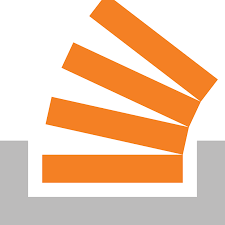

## MASK 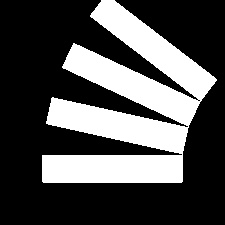

## IMAGEM RESULTANTE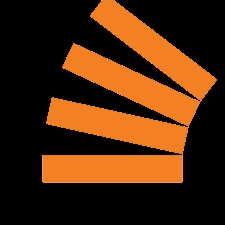

In [ ]:
tirads_vec= [] 
dst2_vec=[]
count=[]
for j in range (0, len(segments['mark'])):
    if segments['mark_2'][j]!="":
        test=segments.loc[segments['img_id']==segments['img_id'][j]]
        l = test['mark_2'].get_values()[0]
        i = 0
        t = 0

        test_1 = re.findall(r"\d+", l) #encontrando todos aqueles digitos entre aspas com 1 ou mais digitos do "vetor" l

        dims = len(test_1)//2 #a dimensão pro x é dims//2 e pro y dims//2 (colocam // provavelmente pq deve dar um numero quebrado)

        temp = np.empty([dims, 2]) 
        
        while i < dims:
            temp[i] = (test_1[t], test_1[t+1]) #Pegando a primeira entrada e a proxima do temp (x, y)
            i = i+1 #atualiza o indice do x
            t = t+2 #atualiza o indice do y
            
        diretorio= "C:/Users/Bernardo/TCC/"
        img = cv2.imread(diretorio+segments['img_id'][j], cv2.IMREAD_GRAYSCALE)
        

           ## (1) REALIZAR O CROPP DA IMAGEM
        rect = cv2.boundingRect(temp.astype('i4'))
        x,y,w,h = rect
        croped = img[y:y+h, x:x+w].copy()

            ## (2) MÁSCARA DA IMAGEM
        temp1 = temp - temp.min(axis=0)

        mask = np.zeros(croped.shape[:2], np.uint8)
        cv2.drawContours(mask, [temp1.astype('i4')], -1, (255, 255, 255), -1, lineType=cv2.LINE_AA)

            ## (3) REALIZAR OPERAÇÃO BITWISE PARA RECORTAR A IMAGEM EXATAMENTE NAS COORDENADAS
        dst = cv2.bitwise_and(croped, croped, mask=mask)

            ## (4) ADICIONAR O FUNDO BRANCO
        bg = np.ones_like(croped, np.uint8)*255
        cv2.bitwise_not(bg,bg, mask=mask)
        dst2 = bg + dst
        
        dst2_vec.append(dst2.tolist())
        
        tirads_vec1= segments.iloc[i]['tirads']
        tirads_vec.append(tirads_vec1)        

        
        
        l = test['mark_1'].get_values()[0]
        i = 0
        t = 0

        test_1 = re.findall(r"\d+", l) #encontrando todos aqueles digitos entre aspas com 1 ou mais digitos do "vetor" l

        dims = len(test_1)//2 #a dimensão pro x é dims//2 e pro y dims//2 (colocam // provavelmente pq deve dar um numero quebrado)

        temp = np.empty([dims, 2]) 
        
        while i < dims:
            temp[i] = (test_1[t], test_1[t+1]) #Pegando a primeira entrada e a proxima do temp (x, y)
            i = i+1 #atualiza o indice do x
            t = t+2 #atualiza o indice do y

        diretorio= "C:/Users/Bernardo/TCC/"
        img = cv2.imread(diretorio+segments['img_id'][j], cv2.IMREAD_GRAYSCALE)

           ## (1) REALIZAR O CROPP DA IMAGEM
        rect = cv2.boundingRect(temp.astype('i4'))
        x,y,w,h = rect
        croped = img[y:y+h, x:x+w].copy()

            ## (2) MÁSCARA DA IMAGEM
        temp1 = temp - temp.min(axis=0)

        mask = np.zeros(croped.shape[:2], np.uint8)
        cv2.drawContours(mask, [temp1.astype('i4')], -1, (255, 255, 255), -1, lineType=cv2.LINE_AA)

            ## (3) REALIZAR OPERAÇÃO BITWISE PARA RECORTAR A IMAGEM EXATAMENTE NAS COORDENADAS
        dst = cv2.bitwise_and(croped, croped, mask=mask)

            ## (4) ADICIONAR O FUNDO BRANCO
        bg = np.ones_like(croped, np.uint8)*255
        cv2.bitwise_not(bg,bg, mask=mask)
        dst2 = bg + dst
        


             
        dst2_vec.append(dst2.tolist())
        tirads_vec1= segments.iloc[i]['tirads']
        tirads_vec.append(tirads_vec1)
        

    else:
        test=segments.loc[segments['img_id']==segments['img_id'][j]]
        l = test['mark_1'].get_values()[0]
        
        
        i = 0
        t = 0

        test_1 = re.findall(r"\d+", l) #encontrando todos aqueles digitos entre aspas com 1 ou mais digitos do "vetor" l

        dims = len(test_1)//2 #a dimensão pro x é dims//2 e pro y dims//2 (colocam // provavelmente pq deve dar um numero quebrado)

        temp = np.empty([dims, 2]) 
        
        while i < dims:
            temp[i] = (test_1[t], test_1[t+1]) #Pegando a primeira entrada e a proxima do temp (x, y)
            i = i+1 #atualiza o indice do x
            t = t+2 #atualiza o indice do y

        diretorio= "C:/Users/Bernardo/TCC/"
        img = cv2.imread(diretorio+segments['img_id'][j], cv2.IMREAD_GRAYSCALE)

           ## (1) REALIZAR O CROPP DA IMAGEM
        rect = cv2.boundingRect(temp.astype('i4'))
        x,y,w,h = rect
        croped = img[y:y+h, x:x+w].copy()

            ## (2) MÁSCARA DA IMAGEM
        temp1 = temp - temp.min(axis=0)

        mask = np.zeros(croped.shape[:2], np.uint8)
        cv2.drawContours(mask, [temp1.astype('i4')], -1, (255, 255, 255), -1, lineType=cv2.LINE_AA)

            ## (3) REALIZAR OPERAÇÃO BITWISE PARA RECORTAR A IMAGEM EXATAMENTE NAS COORDENADAS
        dst = cv2.bitwise_and(croped, croped, mask=mask)

            ## (4) ADICIONAR O FUNDO BRANCO
        bg = np.ones_like(croped, np.uint8)*255
        cv2.bitwise_not(bg,bg, mask=mask)
        dst2 = bg + dst
        

        
        dst2_vec.append(dst2.tolist())
        tirads_vec1= segments.iloc[i]['tirads']
        tirads_vec.append(tirads_vec1)

In [33]:
df_dados=pd.DataFrame([dst2_vec,tirads_vec])
df_dados=df_dados.transpose()
df_dados.columns=[ 'marks', 'tirads']
df_dados.head()

,marks,tirads
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",4a
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",4c
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",4b
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",4c
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",4c


# IMAGENS PROBLEMÁTICAS

(-0.5, 27.5, 22.5, -0.5)

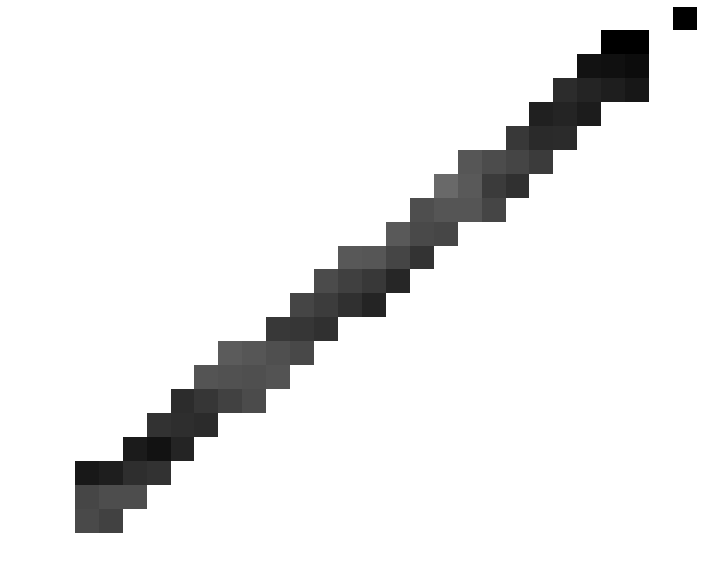

In [73]:
img=df_dados['marks'][297]
plt.imshow(img,cmap='gray')
plt.axis('off')


# EXCLUIR AS IMAGENS COM PROBLEMAS

In [ ]:
df_dados=df_dados.drop(296)
df_dados=df_dados.drop(297)
df_dados=df_dados.drop(299)
df_dados=df_dados.drop(327)
df_dados=df_dados.drop(338)
df_dados=df_dados.drop(361)
df_dados=df_dados.drop(371)
df_dados=df_dados.drop(386)

# SALVAR OS DADOS EM UM ARQUIVO CSV

In [ ]:
df_dados.to_csv('df_dados.csv')

# ----------------------------------------------------------------------------------------------------------------

# <span style="color:GREEN"> RECORTE RETANGULAR </span>


In [ ]:
tirads_vec= [] 
dst2_vec=[]
count=[]
for j in range (0, len(segments['mark'])):
    if segments['mark_2'][j]!="":
        test=segments.loc[segments['img_id']==segments['img_id'][j]]
        l = test['mark_2'].get_values()[0]
        i = 0
        t = 0

        test_1 = re.findall(r"\d+", l) #encontrando todos aqueles digitos entre aspas com 1 ou mais digitos do "vetor" l

        dims = len(test_1)//2 #a dimensão pro x é dims//2 e pro y dims//2 (colocam // provavelmente pq deve dar um numero quebrado)

        temp = np.empty([dims, 2]) 
        
        while i < dims:
            temp[i] = (test_1[t], test_1[t+1]) #Pegando a primeira entrada e a proxima do temp (x, y)
            i = i+1 #atualiza o indice do x
            t = t+2 #atualiza o indice do y
            
        diretorio= "C:/Users/Bernardo/TCC/"
        img = cv2.imread(diretorio+segments['img_id'][j], cv2.IMREAD_GRAYSCALE)
        

           ## (1) REALIZAR O CROPP DA IMAGEM
        rect = cv2.boundingRect(temp.astype('i4'))
        x,y,w,h = rect
        croped = img[y:y+h, x:x+w].copy()


        dst2_vec.append(croped.tolist())
        
        tirads_vec1= segments.iloc[i]['tirads']
        tirads_vec.append(tirads_vec1)        
        
        
        l = test['mark_1'].get_values()[0]
        i = 0
        t = 0

        test_1 = re.findall(r"\d+", l) #encontrando todos aqueles digitos entre aspas com 1 ou mais digitos do "vetor" l

        dims = len(test_1)//2 #a dimensão pro x é dims//2 e pro y dims//2 (colocam // provavelmente pq deve dar um numero quebrado)

        temp = np.empty([dims, 2]) 
        
        while i < dims:
            temp[i] = (test_1[t], test_1[t+1]) #Pegando a primeira entrada e a proxima do temp (x, y)
            i = i+1 #atualiza o indice do x
            t = t+2 #atualiza o indice do y

        diretorio= "C:/Users/Bernardo/TCC/"
        img = cv2.imread(diretorio+segments['img_id'][j], cv2.IMREAD_GRAYSCALE)

           ## (1) REALIZAR O CROPP DA IMAGEM
        rect = cv2.boundingRect(temp.astype('i4'))
        x,y,w,h = rect
        croped = img[y:y+h, x:x+w].copy()




             
        dst2_vec.append(croped.tolist())
        tirads_vec1= segments.iloc[i]['tirads']
        tirads_vec.append(tirads_vec1)
        

    else:
        test=segments.loc[segments['img_id']==segments['img_id'][j]]
        l = test['mark_1'].get_values()[0]
        
        
        i = 0
        t = 0

        test_1 = re.findall(r"\d+", l) #encontrando todos aqueles digitos entre aspas com 1 ou mais digitos do "vetor" l

        dims = len(test_1)//2 #a dimensão pro x é dims//2 e pro y dims//2 (colocam // provavelmente pq deve dar um numero quebrado)

        temp = np.empty([dims, 2]) 
        
        while i < dims:
            temp[i] = (test_1[t], test_1[t+1]) #Pegando a primeira entrada e a proxima do temp (x, y)
            i = i+1 #atualiza o indice do x
            t = t+2 #atualiza o indice do y

        diretorio= "C:/Users/Bernardo/TCC/"
        img = cv2.imread(diretorio+segments['img_id'][j], cv2.IMREAD_GRAYSCALE)

           ## (1) REALIZAR O CROPP DA IMAGEM
        rect = cv2.boundingRect(temp.astype('i4'))
        x,y,w,h = rect
        croped = img[y:y+h, x:x+w].copy()

 
        

        
        dst2_vec.append(croped.tolist())
        tirads_vec1= segments.iloc[i]['tirads']
        tirads_vec.append(tirads_vec1)
        
        

        

# RECORTE RETANGULAR vs RECORTE NAS COORDENADAS

(-0.5, 115.5, 94.5, -0.5)

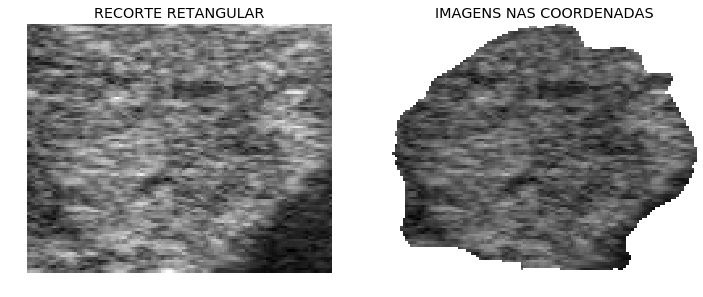

In [37]:

plt.subplot(1,2,1)
plt.title('RECORTE RETANGULAR')
df_dados_quadrado=pd.read_csv('C:/Users/Bernardo/TCC/codigos/df_dados_quadrado.csv')
img=eval(df_dados_quadrado['marks'][0])
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('RECORTE NAS COORDENADAS')
img=df_dados['marks'][0]
plt.imshow(img,cmap='gray')
plt.axis('off')
